### Conceptual Figure

##### 7 parts: 
1. fossil CO2 emissions NDC-pathway until 2100
2. AFOLU CO2 emissions NDC-pathway until 2100
3. sketch extension fossil
4. sketch extension AFOLU
5. distribution minimum fossil CO2 emissions
6. distribution minimum AFOLU CO2 emissions
7. distribution of rate of fossil CO2 emissions reductions post-2100

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
from pathlib import Path

import json
import pyam
import scmdata
import pandas as pd
import numpy as np
from pymagicc.io import MAGICCData

import utils

## plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "all_scenarios"
SOURCE_DATA = str(utils.DATA_DIR / "plotting_data" / "figure1" / f"{ID}.csv")

wg3_emissions = scmdata.ScmRun(SOURCE_DATA, lowercase_cols=True)

<IPython.core.display.Javascript object>

/Users/baur/opt/anaconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (355) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


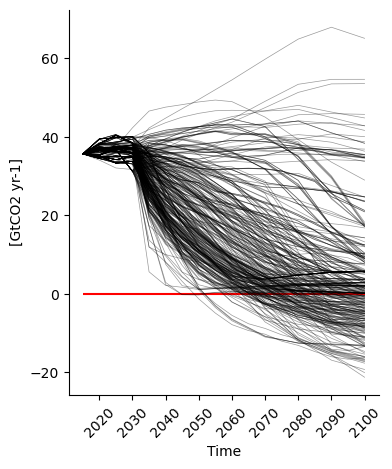

/Users/baur/opt/anaconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (355) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


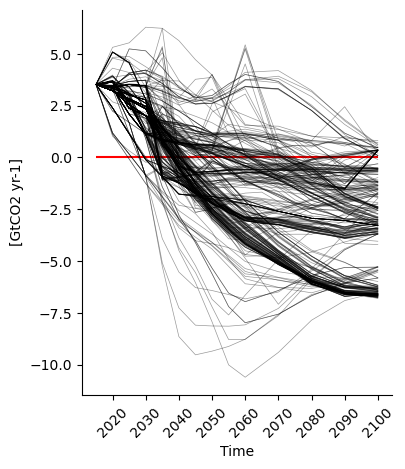

<IPython.core.display.Javascript object>

In [10]:
def plot(var):
    fig, ax = plt.subplots(figsize=(4, 5), frameon=False)

    plt.hlines(0, np.datetime64("2015-01-01"), np.datetime64("2100-01-01"), color="r")
    wg3_emissions.filter(variable=var).lineplot(
        hue="ms", legend=False, palette=["black"], linewidth=0.5, alpha=0.4
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.xticks(rotation=45)
    plt.ylabel("[GtCO2 yr-1]")
    plt.xlabel("Time")
    # plt.grid(True)
    plt.show()


plot("*Energy*")
plot("*AFOLU*")

In [3]:
NR_SCEN = 8  # number of scenarios

SRM_START_YEAR = 2030
ENSEMBLE = list(range(0, 1 + 1))
ID = "rs_floor15_gradient_CDR"

SCENARIOS_min = [0, 101, 201]
SCENARIOS_max = [100, 200, 300]

SCENARIOS_min = [0]
SCENARIOS_max = [7]

VAR = "Effective Radiative Forcing"

<IPython.core.display.Javascript object>

In [4]:
# Extended scneario data
datasets = []

for min_, max_ in zip(SCENARIOS_min, SCENARIOS_max):
    DATA_FILE = Path(
        utils.DATA_DIR
        / "interim"
        / "magicc-output"
        / f"magicc-output_{ID}_{min_}_{max_}.csv"
    )
    datasets.append(scmdata.ScmRun(str(DATA_FILE)))
# data_scen = datasets[0].append(datasets[1])
# data_scen = data_scen.append(datasets[2])
data_extended_scen = datasets[0]
data_extended_scen["ms"] = data_extended_scen["model"] + data_extended_scen["scenario"]
ms_list = data_extended_scen.get_unique_meta("ms")

<IPython.core.display.Javascript object>

In [5]:
# use only a few scenarios
data_extended_scen = data_extended_scen.filter(ms=ms_list[:NR_SCEN])
# use only a few ensemble_members
data_extended_scen = data_extended_scen.filter(ensemble_member=ENSEMBLE)

<IPython.core.display.Javascript object>

In [6]:
data_extended_scen_ERF = data_extended_scen.filter(
    variable="Effective Radiative Forcing"
)

<IPython.core.display.Javascript object>

/Users/znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


NameError: name 'scen_model_list' is not defined

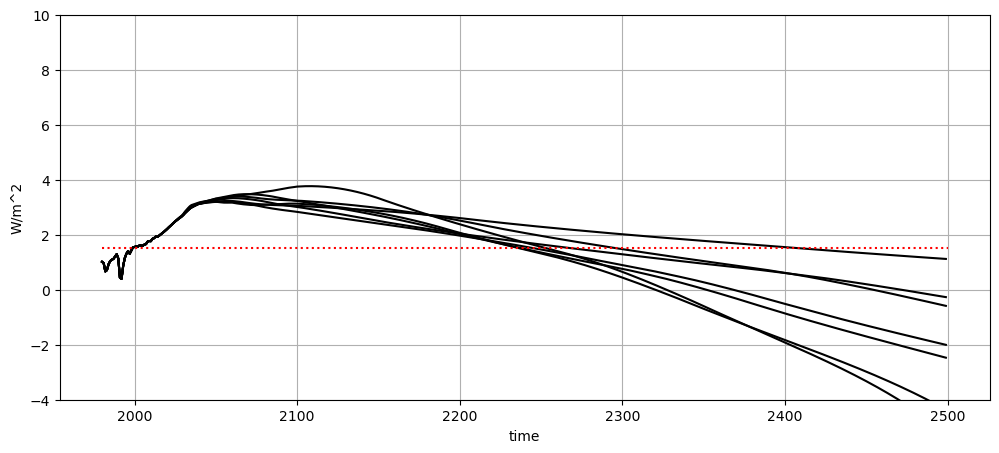

<IPython.core.display.Javascript object>

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
data_extended_scen.filter(variable=VAR, year=range(1980, 2500)).lineplot(
    hue="ms",
    legend=False,
    ci=None,
    palette=["black"],
)
ax.grid()
if VAR == "Effective Radiative Forcing":
    ax.set_ylim(-4, 10)
elif VAR == "Surface Air Temeprature":
    ax.set_ylim(0, 4.5)
plt.hlines(
    1.5,
    np.datetime64("1980-01-01"),
    np.datetime64("2500-01-01"),
    color="r",
    linestyle=":",
)
plt.title(
    VAR + " trajectories extended pathways; " + ID + " N=" + str(len(scen_model_list))
)